In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

# Different sampling frequencies

In [2]:
time_seconds = 1 # in seconds
frequency_sampling = 100 # in Hertz
frequency_sampling1 = 90
freq = [2,5,30]

In [3]:
time = np.arange(0, time_seconds, 1/frequency_sampling1)
N = len(time)
number_of_frequencies = len(freq)
phase = np.round(np.random.rand(number_of_frequencies)*2*np.pi,1)
amp = np.round(np.random.rand(number_of_frequencies)*1,1)
signals = np.cos(2*np.pi*np.outer(freq,time)+phase[:,np.newaxis]) * amp[:, None]
signal = np.sum(signals,0)

In [4]:
time1 = np.arange(0, time_seconds, 1/frequency_sampling)
signals1 = np.cos(2*np.pi*np.outer(freq,time1)+phase[:,np.newaxis]) * amp[:, None]
signal1 = np.sum(signals1,0)

## low FS

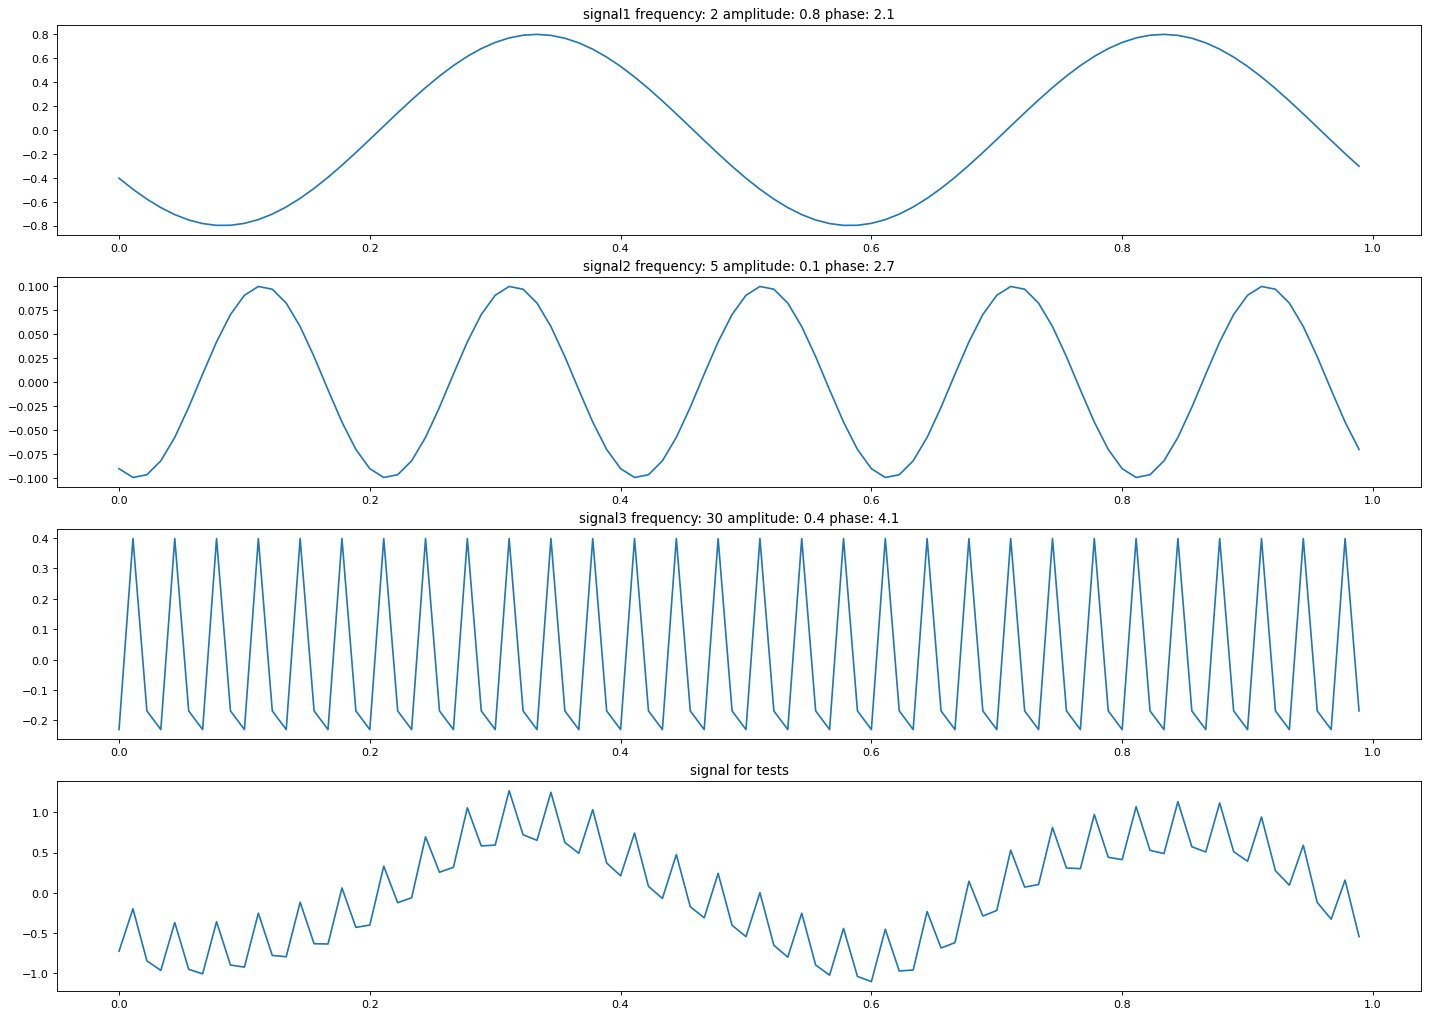

In [5]:
plt.figure(figsize=(22, 16), dpi=80)
temp_N = min([number_of_frequencies,10])
for i in range(temp_N):
    plt.subplot(temp_N+1,1,i+1)
    plt.plot(time, signals[i,:])
    plt.title(f"signal{i+1} frequency: {freq[i]} amplitude: {amp[i]} phase: {phase[i]}")
else:
    plt.subplot(temp_N+1,1,temp_N+1)
    plt.plot(time, signal)
    plt.title(f"signal for tests")

## High FS

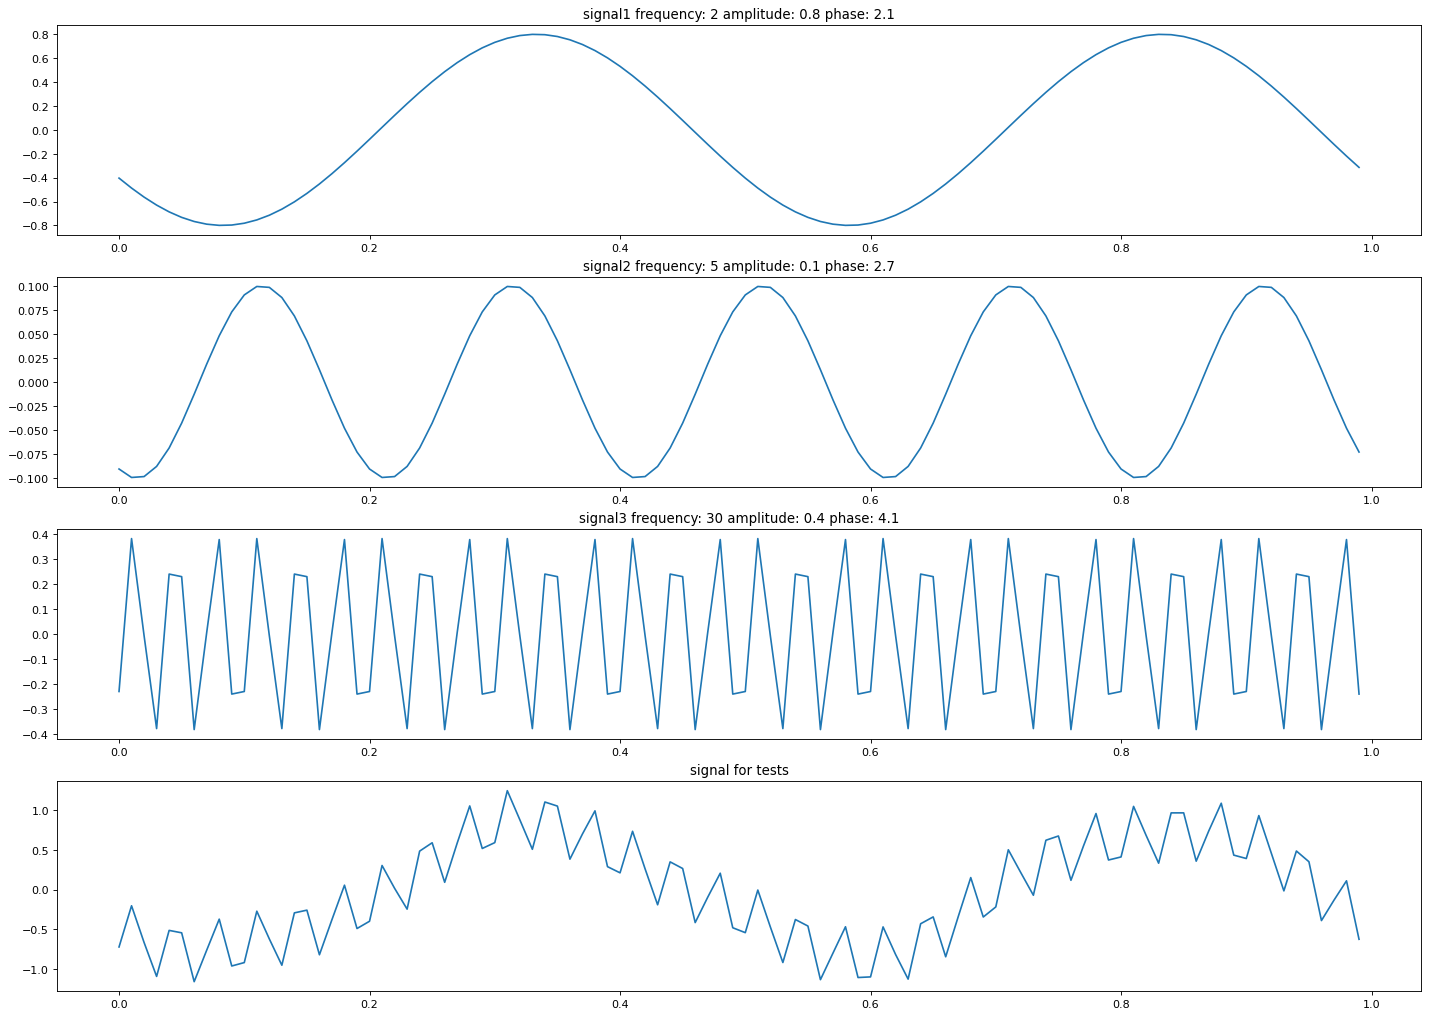

In [6]:
plt.figure(figsize=(22, 16), dpi=80)
temp_N = min([number_of_frequencies,10])
for i in range(temp_N):
    plt.subplot(temp_N+1,1,i+1)
    plt.plot(time1, signals1[i,:])
    plt.title(f"signal{i+1} frequency: {freq[i]} amplitude: {amp[i]} phase: {phase[i]}")
else:
    plt.subplot(temp_N+1,1,temp_N+1)
    plt.plot(time1, signal1)
    plt.title(f"signal for tests")

## Comparison

Text(0.5, 1.0, 'comparison')

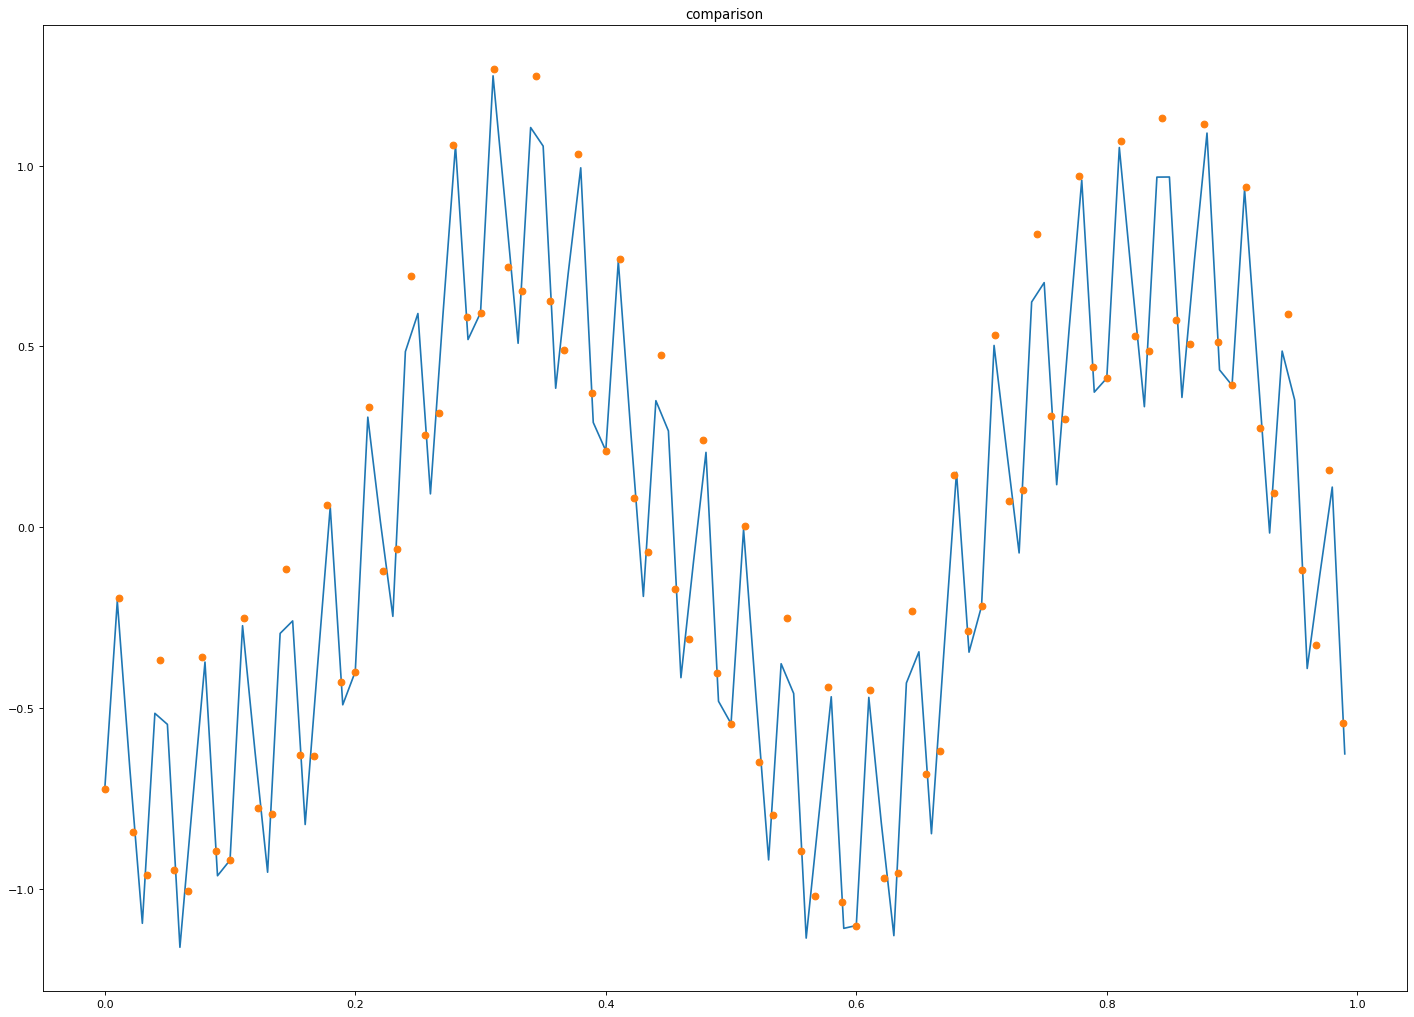

In [7]:
plt.figure(figsize=(22, 16), dpi=80)
plt.plot(time1, signal1, label='high fs')
plt.plot(time, signal,'o', label='low fs')
plt.title(f"comparison")

## Linear interp

In [8]:
y_new = np.interp(time1, time, signal)

Text(0.5, 1.0, 'comparison')

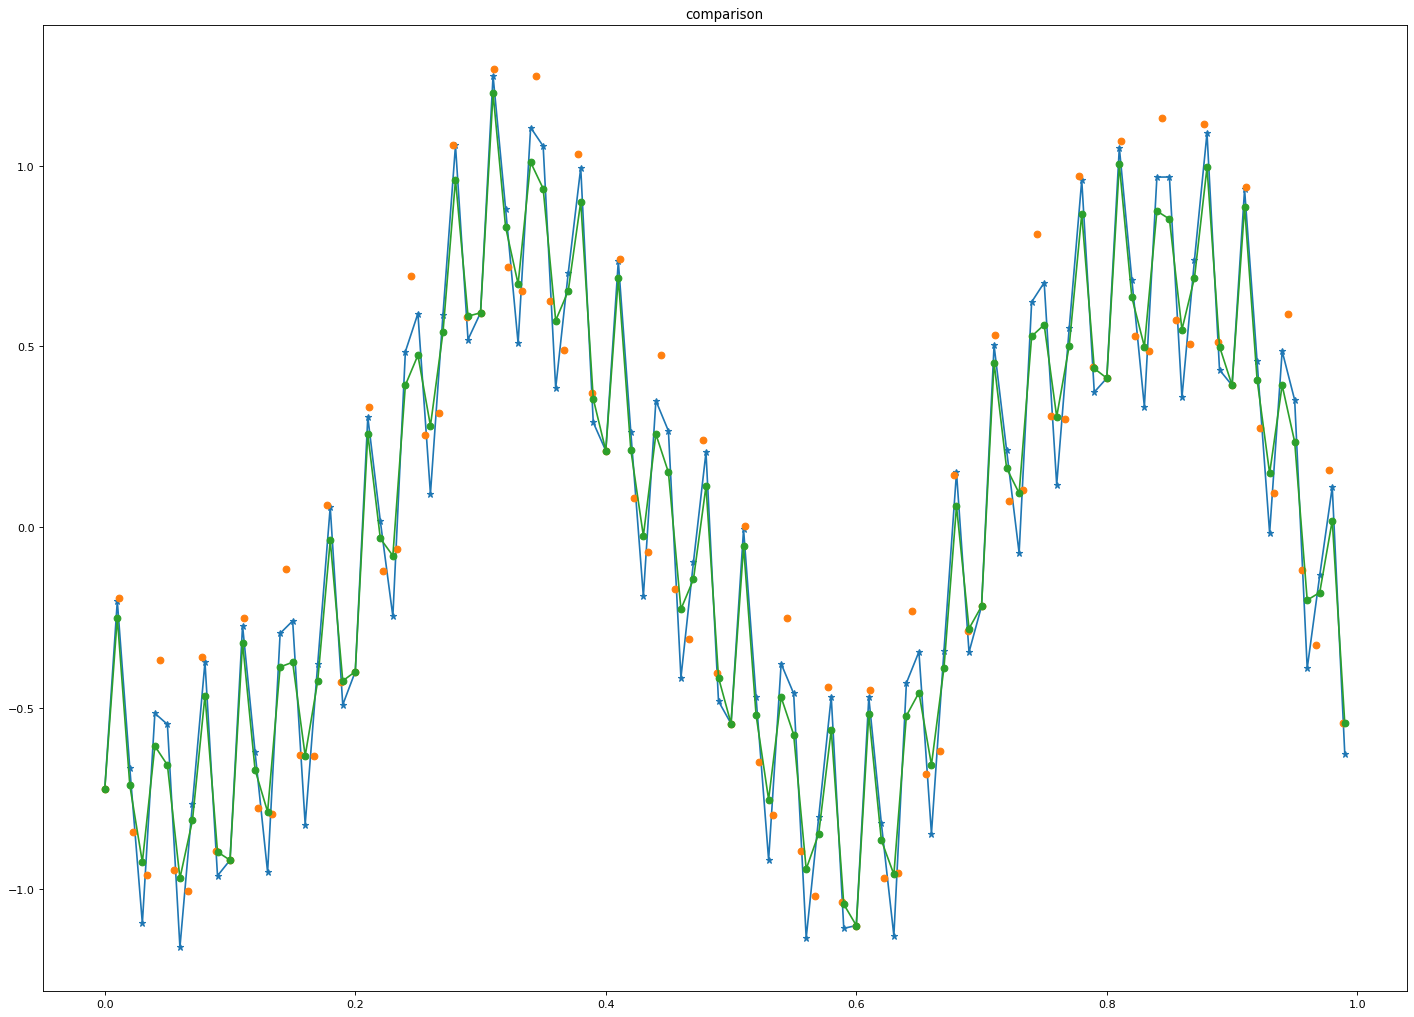

In [9]:
plt.figure(figsize=(22, 16), dpi=80)
plt.plot(time1, signal1, '*-', label='high fs')
plt.plot(time, signal,'o', label='low fs')
plt.plot(time1, y_new, 'o-', label='interp fs')
plt.title(f"comparison")

# Random losses from signal and interp

In [10]:
random_losses = 0.1

In [11]:
n_losses = int(random_losses* len(time1))
ind_temp = [i for i in range(len(time1))]
random.shuffle(ind_temp)

In [12]:
time2 = np.delete(time1, ind_temp[:n_losses])
signal2 = np.delete(signal1, ind_temp[:n_losses])
y_new2 = np.interp(time1, time2, signal2)

Text(0.5, 1.0, 'comparison')

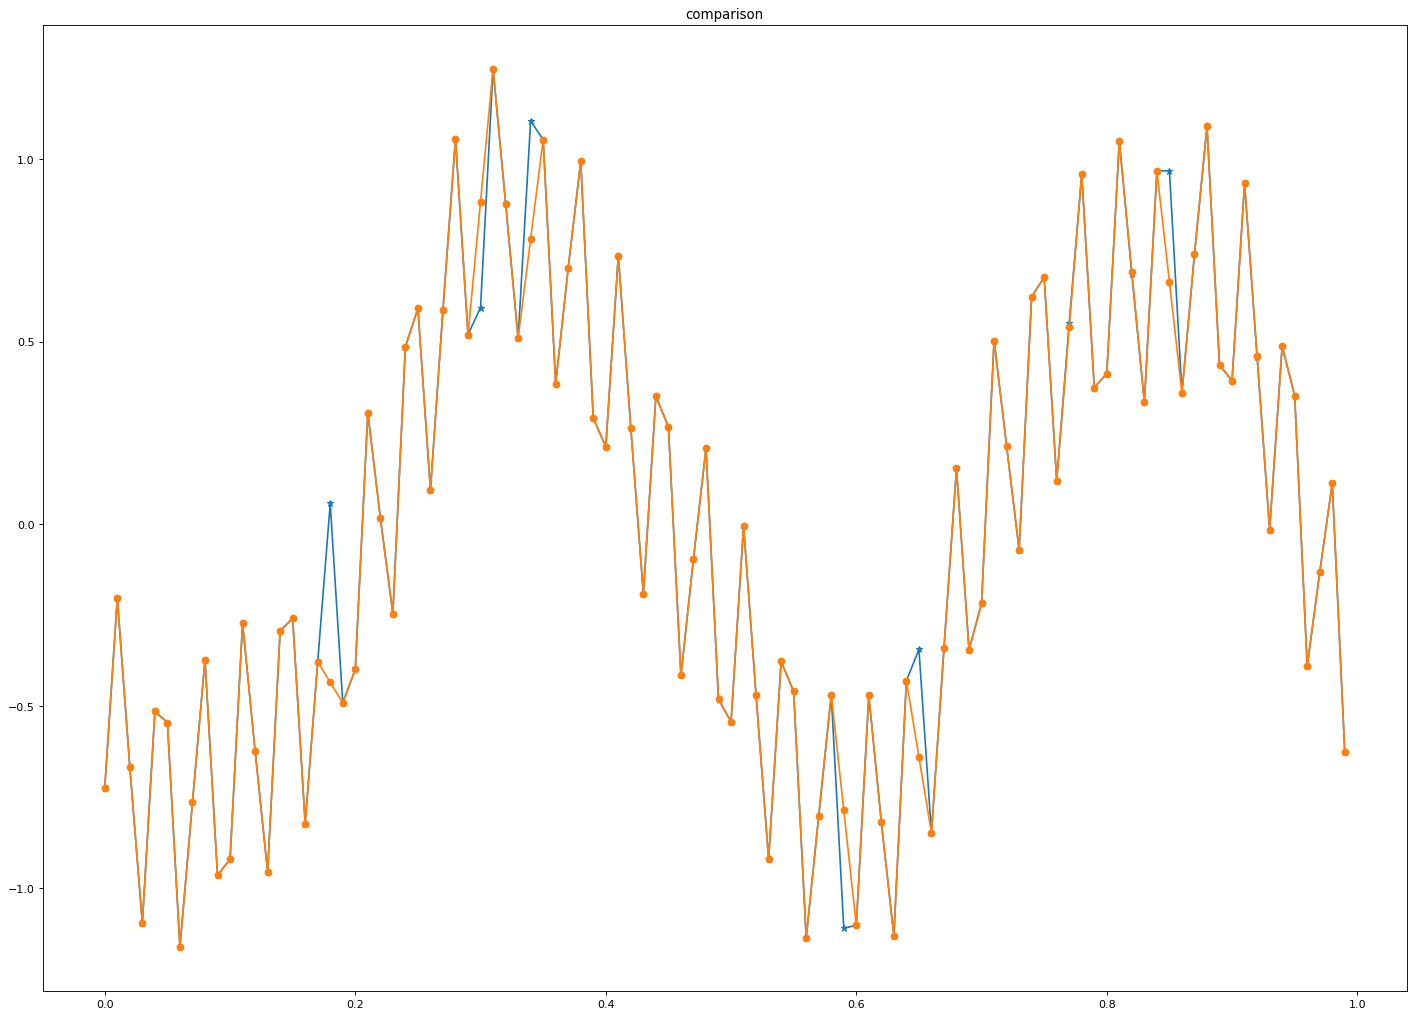

In [13]:
plt.figure(figsize=(22, 16), dpi=80)
plt.plot(time1, signal1, '*-', label='no missing')
plt.plot(time1, y_new2, 'o-', label='filled missing')
plt.title(f"comparison")

# time shift interp

In [14]:
time_shift = 0.0134

In [15]:
time3 = time1 + time_shift
signals3 = np.cos(2*np.pi*np.outer(freq,time3)+phase[:,np.newaxis]) * amp[:, None]
signal3 = np.sum(signals3,0)

In [16]:
y_new3 = np.interp(time1, time3, signal3)

Text(0.5, 1.0, 'comparison')

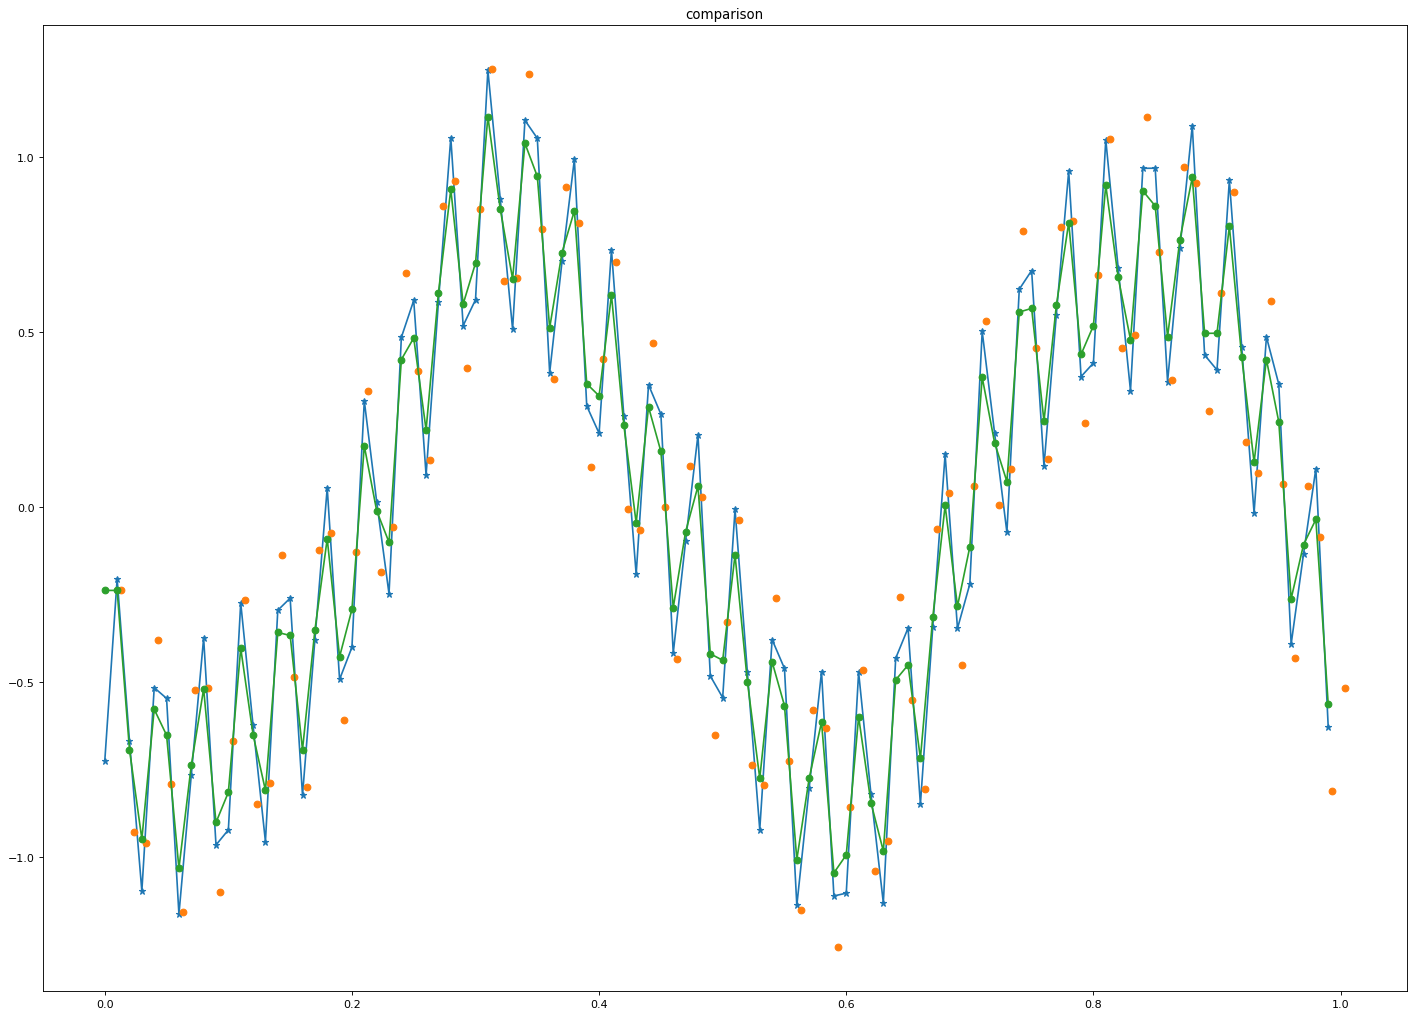

In [17]:
plt.figure(figsize=(22, 16), dpi=80)
plt.plot(time1, signal1, '*-', label='normal')
plt.plot(time3, signal3,'o', label='delayed')
plt.plot(time1, y_new3, 'o-', label='interp delayed')
plt.title(f"comparison")